<img 
    style="position: absolute; 
           left: 60%; 
           top: 0; /* Added to ensure proper positioning */
           height: 500px; 
           width: 40%; /* Maintain the original width */
           object-fit: cover; /* Adjust if necessary */
           clip-path: inset(0px 50px 0px 50px round 10px);" 
    src= "../.github/public_html/fig/Major crack Width development.png"
/>
</figure>


<h1 style="width: 60%; color: #EC6842; font-size: 55pt;">
    <Strong>
        FEA Study
    </Strong>
</h1>

<h2 id="Background"><B>
    Rationale for the project<a class="anchor-link" href="#Background">&#182;</a>
    </B>
</h2>
<p style="text-align: justify; width: 60%; font-weight: normal;">
     This studies case study is the building will also evaluate the capabilities of FEA for the assessment of unreinforced masonry structures undergoing subsidence. For this measure understanding and analysing the capabilities of a finite element analysis are a important part in the validation of the model and the presenting of results. This notebook illustrates some of the different tools built for the analysis of such models and its implementations in different analysis types. Due to the limitations of the analysis output characteristics from DIANA FEA not all components of these analysis are able to have been done algorithmically therefore, it is reccomended to read this modules README.MD notes in order to ensure the different requirements for these analysis are well implemented in your models. 
</p>

## <strong> X | Imports</strong>

In [1]:
from bricks.fea.analysis import analyse_models, setup_analysis
from bricks.fea.analysis.processing.tabulated import process_tb
from bricks.fea.analysis.main import *
from bricks.fea.analysis.processing.main import *
from bricks.fea.analysis.processing.utils import *

import numpy as np
import matplotlib.pyplot as plt

## <strong> 2 | Process runs</strong>

### <strong> 2.1 | Run individual analysis</strong>

In [ ]:
# ------------------------------- TSRCM ------------------------------ #
analysis_info_TSRCM = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[177,178,179,435],
                [35, 166, 203, 387, 523, 684, 723, 867],
                [9, 206, 263, 612]],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[177,178,179,435],
                        [35, 166, 203, 387, 523, 684, 723, 867],
                        [9, 206, 263, 612]],
                'element_size': 200,}]         
    }
}}

plot_settings_TSRCM = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$ '],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1','Crack 5','Crack 9'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ TSCM'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\W2O - TS'
analyse_models(dir,analysis_info_TSRCM, plot_settings_TSRCM, merge = merge_info)

# ------------------------------- TSI RCM ------------------------------ #
analysis_info_TSRCM_I = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[34, 35, 71, 88, 146, 184, 248, 259, 276, 318,
                 335, 363, 364, 367, 420, 607, 609, 731, 736, 750, 794, 815, 850, 877, 887],],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[34, 35, 71, 88, 146, 184, 248, 259, 276,
                        318, 335, 363, 364, 367, 420, 607, 609, 731,
                        736, 750, 794, 815, 850, 877, 887],],
                'element_size': 200,}]         
    }
}}

plot_settings_TSRCM_I = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 6,7'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ TSCM'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\W2I - TS'
analyse_models(dir,analysis_info_TSRCM_I, plot_settings_TSRCM_I, merge = merge_info)

# ------------------------------- EMM-HJ ------------------------------ #
merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

analysis_info = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[38, 433],
                [166, 269, 421, 422, 478, 737],]
    },
    'Damage level': { 
        'parameters': {'cracks': [{'EOI': [[38, 433],
                                           [166, 269, 421, 422, 478, 737],],
                                    'element_size': 200}]
                                    }}}

plot_settings = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1','Crack 5'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ EMM-HJ'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\W2O - EMHJ'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

# ------------------------------- EMM-Staircase ------------------------------ #
analysis_info_EMMS = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[38, 433],
                [267, 277, 412],
                [35, 166, 203, 387, 523, 684, 723, 766],
                [14, 288, 361, 449, 527, 573, 710, 720],
                [119, 151],
                [64, 67, 308, 396, 403, 568, 569, 664, 700]]
    },
    'Damage level': { 
        'parameters': {'cracks': [{'EOI': [
                                   [267, 277, 412],
                                   [35, 166, 203, 387, 523, 684, 723, 766],
                                   [119, 151],
                                   [38, 433],
                                   [14, 288, 361, 449, 527, 573, 710, 720],                                   
                                   [64, 67, 308, 396, 403, 568, 569, 664, 700]],
                       'element_size': 200},
                        {'EOI': [[267, 277, 412],
                                 [35, 166, 203, 387, 523, 684, 723, 766],
                                 [119, 151]],
                         'element_size': 200}]
                         }}}

plot_settings_EMMS = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1','Crack 5','Crack 9','Crack Superior-Left','Crack Middle-Right','Crack Inferior-Right'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ EMMS','$\psi$ EMMS observed'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info_EMMS = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\W2O - EMS'
analyse_models(dir,analysis_info_EMMS, plot_settings_EMMS, merge = merge_info_EMMS)

In [ ]:

# ------------------------------- EMMI S ------------------------------ #
analysis_info = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[34, 35, 154, 248],
                [65, 66, 145, 212, 219, 226, 227, 354],
                [679, 706, 737, 822],
                [613, 646, 692, 699, 701, 703, 758, 876, 910, 920],
                [5, 95, 160, 165, 239, 555, 559, 580, 790, 844]],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[34, 35, 154, 248],
                         [65, 66, 145, 212, 219, 226, 227, 354],
                         [679, 706, 737, 822],
                         [613, 646, 692, 699, 701, 703, 758, 876, 910, 920],
                         [5, 95, 160, 165, 239, 555, 559, 580, 790, 844]],
                'element_size': 200,},
                {'EOI': [[34, 35, 154, 248],
                         [65, 66, 145, 212, 219, 226, 227, 354]],
                'element_size': 200,}]         
    }
}}

plot_settings = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 7','Crack 6','Crack Bottom', 'Crack Right','Remaining damage'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ EMM','$\psi$ EMM Observed'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\W2I - EMS'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

In [ ]:
## Do again for the mesh models

# ------------------------------- TSRCM - Mesh ------------------------------ #
analysis_info_mesh = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[64, 363, 364, 542, 880],
                [148, 329, 382, 693, 787, 991, 1002, 1039, 1454, 1500, 1647, 2409, 2510, 2665, 2754, 3048, 3101, 3256, 3285],
                [140, 557, 763, 1481, 1601, 2136, 2200, 2474, 2624]],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[64, 363, 364, 542, 880],
                        [148, 329, 382, 693, 787, 991, 1002, 1039, 1454, 1500, 1647, 2409, 2510, 2665, 2754, 3048, 3101, 3256, 3285],
                        [140, 557, 763, 1481, 1601, 2136, 2200, 2474, 2624]],
                'element_size': 200,}]         
    }
}}

plot_settings_mesh = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1','Crack 5','Crack 9'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ TSCM'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\W2O - TS - 0.1m'
analyse_models(dir,analysis_info_mesh, plot_settings_mesh, merge = merge_info)

# ------------------------------- TSRCMI - Mesh ------------------------------ #
analysis_info_mesh = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[59, 60, 123, 228, 258, 259, 280, 357, 362, 379, 424, 426, 663, 669, 697, 704,
                 716, 727, 744, 745, 777, 787, 792, 821, 847, 946, 961, 984, 1006, 1036, 1053,
                 1055, 1151, 1176, 1217, 1358, 1359, 1369, 1536, 1562, 2227, 2235, 2277, 2344,
                 2345, 2498, 2729, 2740, 2859, 3040, 3239, 3271, 3275, 3301, 3313, 3323, 3368,
                 3411, 3432, 3474, 3509, 3569, 3647],],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[59, 60, 123, 228, 258, 259, 280, 357, 362, 379, 424, 426, 663, 669, 697, 704,
                 716, 727, 744, 745, 777, 787, 792, 821, 847, 946, 961, 984, 1006, 1036, 1053,
                 1055, 1151, 1176, 1217, 1358, 1359, 1369, 1536, 1562, 2227, 2235, 2277, 2344,
                 2345, 2498, 2729, 2740, 2859, 3040, 3239, 3271, 3275, 3301, 3313, 3323, 3368,
                 3411, 3432, 3474, 3509, 3569, 3647],],
                 'element_size': 200,}]         
    }
}}

plot_settings_mesh = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 6,7'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ TSCM'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\W2I - TS - 0.1m'
analyse_models(dir,analysis_info_mesh, plot_settings_mesh, merge = merge_info)

# ------------------------------- EMM-Staircase Mesh ------------------------------ #
analysis_info = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI':  [[13, 70, 493, 697, 907, 3752],
                [329, 991, 1002, 1374, 1500, 2116, 2182, 2408, 2409, 2665, 2674, 3090, 3101, 3205, 3206,1, 3241],
                [137, 140, 763, 1672, 1690, 1957, 2417, 2897, 3235],
                [362, 432, 852, 1240, 2294],
                [438, 856, 1285, 1524, 2070, 2192, 2343, 2726, 3355, 3453],                                   
                [111, 450, 932, 1010, 1617, 1702, 1794, 1907, 2433]]
    },
    'Damage level': { 
        'parameters': {'cracks': [{'EOI': [
                                   [13, 70, 493, 697, 907, 3752],
                                   [329, 991, 1002, 1374, 1500, 2116, 2182, 2408, 2409, 2665, 2674, 3090, 3101, 3205, 3206,1, 3241],
                                   [137, 140, 763, 1672, 1690, 1957, 2417, 2897, 3235],
                                   [362, 432, 852, 1240, 2294],
                                   [438, 856, 1285, 1524, 2070, 2192, 2343, 2726, 3355, 3453],                                   
                                   [111, 450, 932, 1010, 1617, 1702, 1794, 1907, 2433]],
                       'element_size': 200},]
                         }}}

plot_settings = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1','Crack 5','Crack 9 ','Crack Top-left','Crack Middle-Right','Crack Inferior-Right'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ EMMS'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\W2O - EMS - 0.1m'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

# ------------------------------- EMMI-Staircase Mesh ------------------------------ #
analysis_info = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI':  [[16, 60, 218, 258, 259, 362, 363, 379, 542, 545, 731, 787, 901],
                [120, 422, 484, 558, 572, 714, 717, 750, 1292, 1428],]
    },
    'Damage level': { 
        'parameters': {'cracks': [{'EOI':  [[16, 60, 218, 258, 259, 362, 363, 379, 542, 545, 731, 787, 901],
                                            [120, 422, 484, 558, 572, 714, 717, 750, 1292, 1428],],
                                    'element_size': 200},]
                         }}}

plot_settings = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$','${u_{xB}}/{u_{yA}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 7','Crack 6'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ EMMS'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\W2I - EMS - 0.1m'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

### <strong> 2.2 | Run compared analysis</strong>

In [ ]:
# ------------------------------- TSRCM ------------------------------ #
combined_info_TSRCM = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[177,178,179,435],
                [35, 166, 203, 387, 523, 684, 723, 867],
                [9, 206, 263, 612]],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[177,178,179,435],
                        [35, 166, 203, 387, 523, 684, 723, 867],
                        [9, 206, 263, 612]],
                'element_size': 200,}]         
    }
}}

combined_settings_TSRCM = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$ TSCM','${u_{xB}}/{u_{yA}}$ TSCM'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1 TSCM ','Crack 5 TSCM','Crack 9 TSCM'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['${\psi_{TSCM}}$'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}


data_TSCM = {}
data_TSCM['name'] = 'TSCM-O',
data_TSCM['analysis_info'] = combined_info_TSRCM
data_TSCM['plot_settings'] = combined_settings_TSRCM
data_TSCM['dir'] = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\W2O - TS\2DW2O_-_TS_NLA.tb'

# ------------------------------- EMM S ------------------------------ #
combined_info_EMMS = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[38, 433],
                [267, 277, 412],
                [35, 166, 203, 387, 523, 684, 723, 766]]
    },
    'Damage level': { 
        'parameters': {'cracks': [{'EOI': [
                                   [267, 277, 412],
                                   [35, 166, 203, 387, 523, 684, 723, 766],
                                   [119, 151],
                                   [38, 433],
                                   [14, 288, 361, 449, 527, 573, 710, 720],                                   
                                   [64, 67, 308, 396, 403, 568, 569, 664, 700]],
                       'element_size': 200},]
                         }}}


combined_settings_EMMS = {
    'Mutual': {
        'traces': ['${u_{yB}}/{u_{yA}}$ EMM','${u_{xB}}/{u_{yA}}$ EMM'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1 EMM','Crack 5 EMM','Crack 9 EMM'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['${\psi_{EMM}}$'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

data_EMMO = {}
data_EMMO['name'] = 'EMM - O'
data_EMMO['analysis_info'] = combined_info_EMMS
data_EMMO['plot_settings'] = combined_settings_EMMS
data_EMMO['dir'] = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\W2O - EMS\2DW2O_-_EMS_NLA.tb'

plot_data_list = [data_TSCM, data_EMMO]
cfigs = compare_models(plot_data_list)

In [ ]:
# ------------------------------- TSRCM ------------------------------ #
combined_info_TSRCM = {
   'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[34, 35, 71, 88, 146, 184, 248, 259, 276, 318, 335, 363, 364, 367, 420, 607, 609, 731, 736, 750, 794, 815, 850, 877, 887]]
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[34, 35, 71, 88, 146, 184, 248, 259, 276,
                        318, 335, 363, 364, 367, 420, 607, 609, 731,
                        736, 750, 794, 815, 850, 877, 887]],
                'element_size': 200}]
        }
    }
}

combined_settings_TSRCM = {
    'Mutual': {
        'traces': ['${u_{y,B}}/{u_{y,A}}$ TSCM','${u_{x,B}}/{u_{y,A}}$ TSCM'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 6,7 TSCM'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['${\psi_{TSCM}}$'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

data_TSCM = {}
data_TSCM['name'] = 'TSCM-I'
data_TSCM['analysis_info'] = combined_info_TSRCM
data_TSCM['plot_settings'] = combined_settings_TSRCM
data_TSCM['dir'] = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\W2I - TS\2DW2I_-_TS_NLA.tb'

# ------------------------------- EMMI S ------------------------------ #
combined_info_EMMS = {
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[34, 35, 154, 248],
                [65, 66, 145, 212, 219, 226, 227, 354],]
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[34, 35, 154, 248],
                         [65, 66, 145, 212, 219, 226, 227, 354],
                         [613, 646, 692, 699, 701, 703, 758, 876, 910, 920]],
                'element_size': 200}]
        }
    }
}

combined_settings_EMMS = {
    'Mutual': {
        'traces': ['${u_{y,B}}/{u_{y,A}}$ EMM','${u_{x,B}}/{u_{y,A}}$ EMM'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 7 EMM','Crack 6 EMM'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['${\psi_{EMM}}$'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

data_EMMO = {}
data_EMMO['name'] = 'EMM-I'
data_EMMO['analysis_info'] = combined_info_EMMS
data_EMMO['plot_settings'] = combined_settings_EMMS
data_EMMO['dir'] = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\W2I - EMS\2DWI_-_EMS_NLA.tb'
plot_data_list = [data_TSCM, data_EMMO]
cfigs = compare_models(plot_data_list)


In [15]:
import matplotlib.pyplot as plt

# Assuming cfigs['Damage level'] is a matplotlib figure
fig = cfigs['Damage level']

# Get the axes from the figure
ax = fig.gca()

# Change the legend position to the top-left corner
legend = ax.legend(loc='upper left')

# Update the figure canvas to ensure the changes are reflected
fig.canvas.draw()

# Display the figure
plt.show()


In [ ]:
fig

## <strong> 3 | Analyse</strong>

### <strong> 3.2 | Find analysis max min</strong>

In [ ]:
dirTS =  r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\2\Outer\2DW20 - TS\Wall2_outer_NLA.tb'
dirHJ = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Outer\2DW2O - EMHJ\Wall2_outer_demo_NLA.tb'
dirS = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Outer\2DW2O - EMS\Wall2_outer_demo_NLA.tb'
dirITS = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\2\Inner\2DW2I - TS\2DW2I_-_TS_NLA.tb'
dirIS = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Inner\2DWI - EMS\2DWI_-_EMS_NLA.tb'

dirs = [dirTS,dirHJ,dirS,dirITS,dirIS]
df_l = []

for dir in dirs:
    df = process_tb(dir)
    df_l.append(df)

In [ ]:
# Initialize a dictionary to hold max and min values for each model
model_stats = {}

# Initialize variables for the global maximum of S1 and the corresponding model and step
global_s1_max = float('-inf')
global_s1_model = None
global_s1_step = None

for i, rr in enumerate(df_l):
    # Calculate max and min for E1, S1, and Ecw1 for the current model
    emx = rr['E1'].max()
    emn = rr['E1'].min()
    smx = rr['S1'].max()
    smn = rr['S1'].min()
    cmx = rr['Ecw1'].max()
    
    # Find the row corresponding to the maximum S1 value in the current model
    max_s1_row = rr.loc[rr['S1'].idxmax()]

    # Check if this S1 max is greater than the current global maximum
    if smx > global_s1_max:
        global_s1_max = smx
        global_s1_model = i
        global_s1_step = max_s1_row['Step nr.']

    # Store the max and min values for the current model
    model_stats[i] = {
        'E1_max': emx,
        'E1_min': emn,
        'S1_max': smx,
        'S1_min': smn,
        'Ecw1_max': cmx,
        'S1 step': max_s1_row['Step nr.']
    }

# Add the global maximum S1 info to the model_stats dictionary
model_stats['global'] = {
    'global_S1_max': global_s1_max,
    'global_S1_model': global_s1_model,
    'global_S1_step': global_s1_step
}

# Optionally, convert the model_stats dictionary to a DataFrame for better visualization
import pandas as pd
stats_df = pd.DataFrame(model_stats).T  # Transpose to have models as rows
pd.options.display.float_format = '{:.2e}'.format
stats_df


,E1_max,E1_min,S1_max,S1_min,Ecw1_max,S1 step,global_S1_max,global_S1_model,global_S1_step
0,8.08e-02,-7.74e-05,3.44e-01,-8.59e-01,2.15e+01,6.10e+01,NaN,NaN,NaN
1,1.39e-02,-3.94e-04,2.74e+00,-3.52e+00,3.86e+00,7.50e+02,NaN,NaN,NaN
2,1.70e-02,-1.57e-04,2.48e+00,-1.70e+00,8.54e+00,6.30e+02,NaN,NaN,NaN
3,7.41e-02,-1.09e-04,2.55e+03,-1.32e+03,2.13e+01,3.77e+02,NaN,NaN,NaN
4,2.95e-02,-2.74e-04,5.04e+00,-2.86e+00,1.78e+01,7.50e+02,NaN,NaN,NaN
global,NaN,NaN,NaN,NaN,NaN,NaN,2.55e+03,3.00e+00,3.77e+02


In [ ]:
import pandas as pd

pd.DataFrame({'E1': [emx,emn],'S1': [smx,smn],'Ecw1': [cmx,cmn]},index=['Max','Min'])

,E1,S1,Ecw1
Max,0.080500,5.961,21.47000
Min,-0.000394,-3.523,-0.06749


### <strong> 3.3 | Produce plots</strong>

In [4]:
base_path = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models'

config = {
    'results': [
        {
            'component': 'TDtY',
            'result': 'Displacements',
            'type': 'Node',
            'limits': [-35, -28, -24, -20, -16, -12, -8, -4, 0]
        },
        {
            'component': 'E1',
            'result': 'Total Strains',
            'type': 'Element',
            'location': 'mappedintpnt',
            'limits': [-0.004, -0.002, 0, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.02, 0.08]
        },
        {
            'component': 'S1',
            'result': 'Cauchy Total Stresses',
            'type': 'Element',
            'location': 'mappedintpnt',
            'limits': [-3.5, -2, -1, -0.05, -0.01, 0, 0.01, 0.05, 1, 3, 61]
        },
        {
            'component': 'Ecw1',
            'result': 'Crack-widths',
            'type': 'Element',
            'location': 'mappedintpnt',
            'limits': [0, 1, 2, 3, 4, 5, 10, 15, 20]
        }
    ],
    'script': {
        'analysis': "NLA",
        'load_cases': ['Building', 'Sub Deformation'],
        'load_steps': [30, 720],
        'load_factors_init': [0.0330000, 0.00138800],
        'snapshots': 6,
        'view_settings': {
            'view_point': [0, 0, 25.0, 0, 1, 0, 5.2, 3.1, 5.5e-17, 19, 3.25],
            'title_font_size': 36,
            'legend_font_size': 34,
            'annotation_font_size': 28
        }
    }
}

setup_analysis(base_path, config)

## <strong> 4 | Try</strong>

In [2]:
dir = r'C:\Users\javie\Desktop\Demo\ML\monitor\monitoring_df.csv'
df = pd.read_csv(dir)

dir2 = r'C:\Users\javie\Desktop\Demo\Optimise\monitor\monitoring_df.csv'
df2 = pd.read_csv(dir2)

dir3 = r'C:\Users\javie\Desktop\EMM\ML\monitor\monitoring_df.csv'
df3 = pd.read_csv(dir3)

In [13]:
min_row = df3.loc[df3['Psi'].idxmin()]
print(min_row)

Metric                            NaN
Total Loss                   0.106472
Targets       [0.56440322 0.05366635]
Psi                          3.791459
Time                         00:05:16
Name: 155, dtype: object


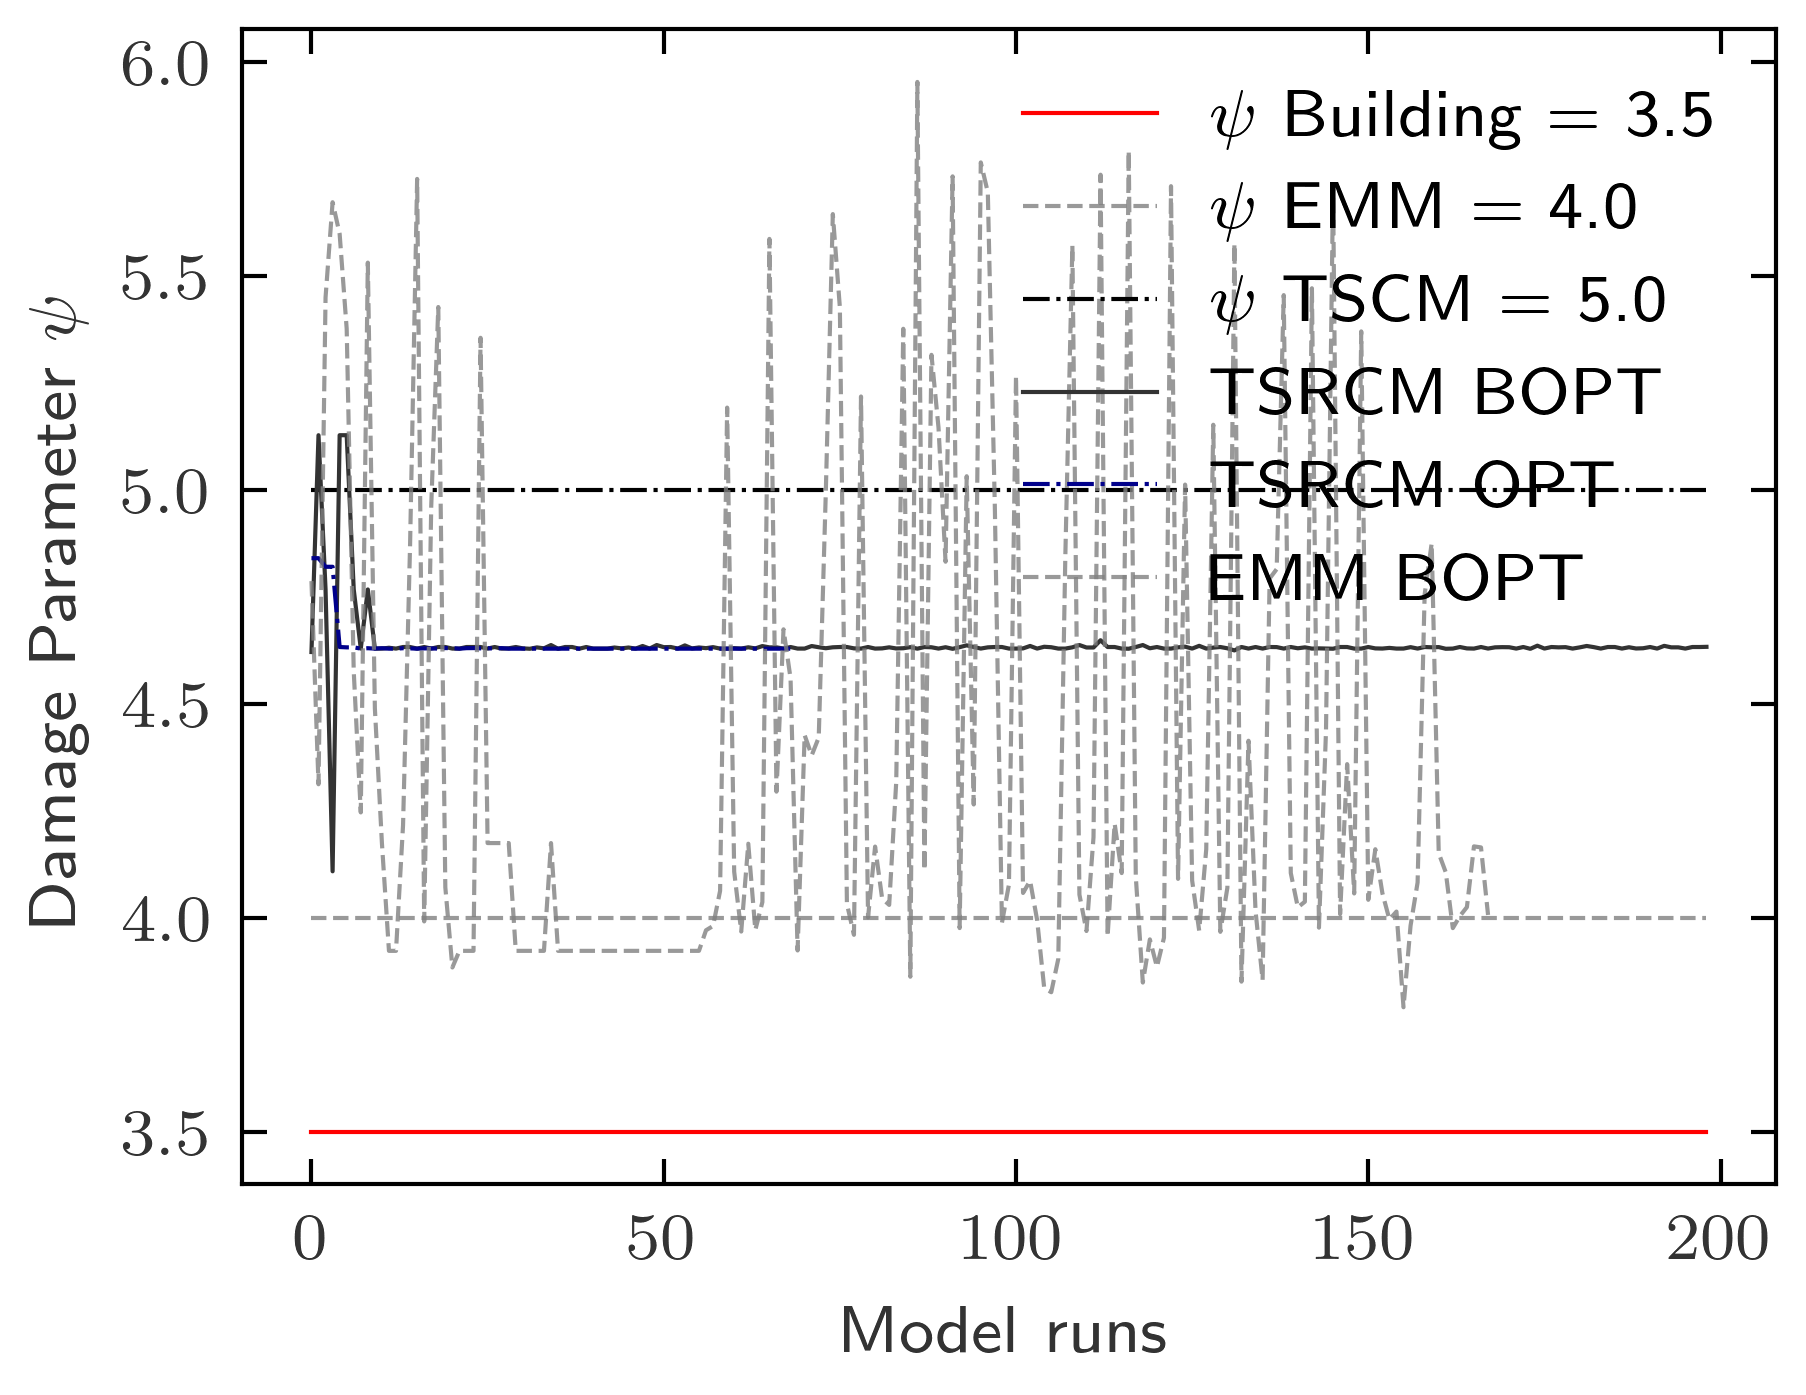

In [8]:
target = 3.5
target_b = np.linspace(target, target, max(len(df), len(df2), len(df3)))
target_ts = np.linspace(5.0, 5.0, max(len(df), len(df2), len(df3)))
target_em = np.linspace(4.0, 4.0, max(len(df), len(df2), len(df3)))

plt.plot(target_b, color = 'red', label='$\psi$ Building = 3.5')
plt.plot(target_em, color = 'grey', label='$\psi$ EMM = 4.0',alpha = 0.8)
plt.plot(target_ts, color = 'black', label='$\psi$ TSCM = 5.0')
plt.plot(df['Psi'], label='TSRCM BOPT', linestyle = 'solid')
plt.plot(df2['Psi'], label='TSRCM OPT', linestyle = 'dashdot', color = 'darkblue')
plt.plot(df3['Psi'], label='EMM BOPT', linestyle = 'dashed', color = 'grey', alpha = 0.8)

plt.xlabel('Model runs')
plt.ylabel('Damage Parameter $\psi$')
plt.legend(loc='best')


In [62]:
import pickle

# Path to the pickle file
pickle_file_path = r'C:\Users\javie\Desktop\Demo\ML\monitor\gp_model.pkl'

# Open the pickle file and load the variable
with open(pickle_file_path, 'rb') as file:
    variable = pickle.load(file)
gp_model_tscm = variable 

pickle_file_path = r'C:\Users\javie\Desktop\EMM\ML\monitor\gp_model.pkl'

# Open the pickle file and load the variable
with open(pickle_file_path, 'rb') as file:
    variable = pickle.load(file)
gp_model_EMM = variable 

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from botorch.utils.transforms import normalize, unnormalize

# Define the input bounds
bounds = torch.tensor([[0.1, 15.0], [0.01, 0.5]])  # Adjust bounds as necessary

# Generate a grid of points
grid_size = 50
x1 = torch.linspace(0.0, 1.0, grid_size)
x2 = torch.linspace(0.0, 1.0, grid_size)
X1, X2 = torch.meshgrid(x1, x2)
X_grid = torch.cat([X1.unsqueeze(-1), X2.unsqueeze(-1)], dim=-1).view(-1, 2)

# Normalize the grid points
X_grid_normalized = normalize(X_grid, bounds)

# Predict using the GP model
gp_model_tscm.eval()
with torch.no_grad():
    posterior = gp_model_tscm.posterior(X_grid_normalized)
    mean = posterior.mean.squeeze().numpy()
    variance = posterior.variance.squeeze().numpy()

# Reshape the mean and variance for plotting
mean = mean.reshape(grid_size, grid_size)
minim = mean.max()
mean = (mean - (minim / mean.min())) / np.max(np.abs(mean)) 
mean = mean - mean.min()
variance = variance.reshape(grid_size, grid_size)

# Plotting the surface
fig = plt.figure(figsize=(12, 6))

# Mean surface
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X1.numpy(), X2.numpy(), mean, cmap='cool')
ax.set_xlabel('Standardised Tensile Strength $f_t$')
ax.set_ylabel('Standardised Fracture Energy $G_fI$')
ax.set_zlabel('Standardised Loss')

# Set panes and grid to be transparent
ax.tick_params(axis='x', which='both', direction='in')
ax.tick_params(axis='y', which='both', direction='in')
ax.tick_params(axis='z', which='both', direction='in')
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.zaxis.set_minor_locator(plt.NullLocator())

# Define the input bounds
bounds = torch.tensor([[0.1, 1.0], [0.01, 0.1]])  # Adjust bounds as necessary

# Generate a grid of points
grid_size = 50
x1 = torch.linspace(0.0, 1.0, grid_size)
x2 = torch.linspace(0.0, 1.0, grid_size)
X1, X2 = torch.meshgrid(x1, x2)
X_grid = torch.cat([X1.unsqueeze(-1), X2.unsqueeze(-1)], dim=-1).view(-1, 2)

# Normalize the grid points
X_grid_normalized = normalize(X_grid, bounds)

# Predict using the GP model
gp_model_EMM.eval()
with torch.no_grad():
    posterior = gp_model_EMM.posterior(X_grid_normalized)
    mean = posterior.mean.squeeze().numpy()
    variance = posterior.variance.squeeze().numpy()

# Reshape the mean and variance for plotting
mean = mean.reshape(grid_size, grid_size)
mean_min = mean.min()
mean_max = mean.max()

mean = mean - mean_min
mean = mean / (mean_max - mean_min)
# Plotting the surface
fig = plt.figure(figsize=(12, 6))

# Mean surface
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X1.numpy(), X2.numpy(), mean, cmap='cool')
ax.set_xlabel('Standardised Tensile Strength $f_t$')
ax.set_ylabel('Standardised Fracture Energy $G_fI$')
ax.set_zlabel('Standardised Loss')

# Set panes and grid to be transparent
ax.tick_params(axis='x', which='both', direction='in')
ax.tick_params(axis='y', which='both', direction='in')
ax.tick_params(axis='z', which='both', direction='in')
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.zaxis.set_minor_locator(plt.NullLocator())


